# Imports

In [2]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# Parse logs

In [3]:
logs = ['./reports/logs/lr_0.01/20220601_062727.log.json', './reports/logs/lr_0.005/20220530_031244.log.json', './reports/logs/lr_0.0025/20220603_213830.log.json']
learning_rates = ['0.01', '0.005', '0.0025']
temp = []

for log, learning_rate in zip(logs, learning_rates):
    data = pd.read_json(log, lines=True)
    data['learning_rate'] = learning_rate # add learning rate column
    temp.append(data) 

temp = pd.concat(temp, ignore_index=True)
df = temp[temp.isnull().sum(axis=1) < 24] # removes the first line of each json which contains the environmental info and seed

# Validation data only has secondary metrics (i.e precision, recall, etc), but training data only has loss (loss_rpn_cls, etc)
val_df = df[df['mode'] == 'val']
val_df = val_df.dropna(axis=1)
train_df = df[df['mode'] == 'train']
train_df = train_df.dropna(axis=1)

display(val_df)
display(train_df)

,mode,epoch,iter,lr,IDF1,MOTA,MOTP,FP,FN,IDSw,...,track_OVERALL_copypaste,track_AVERAGE_copypaste,bbox_mAP,bbox_mAP_50,bbox_mAP_75,bbox_mAP_s,bbox_mAP_m,bbox_mAP_l,bbox_mAP_copypaste,learning_rate
1081,val,2.0,39973.0,0.01000,0.616,0.482,0.819,87245.0,126875.0,15442.0,...,0.616 0.482 0.819 87245 126875 15442 0.713 0.7...,0.364 0.156 0.687 87245 126875 15442 0.370 0.5...,0.227,0.410,0.218,0.102,0.254,0.354,0.227 0.410 0.218 0.102 0.254 0.354,0.01
2162,val,4.0,39973.0,0.01000,0.632,0.514,0.825,73816.0,128092.0,13228.0,...,0.632 0.514 0.825 73816 128092 13228 0.711 0.8...,0.408 0.229 0.695 73816 128092 13228 0.393 0.6...,0.258,0.452,0.254,0.113,0.284,0.397,0.258 0.452 0.254 0.113 0.284 0.397,0.01
3243,val,6.0,39973.0,0.01000,0.636,0.519,0.826,75199.0,125095.0,12719.0,...,0.636 0.519 0.826 75199 125095 12719 0.717 0.8...,0.418 0.244 0.696 75199 125095 12719 0.399 0.6...,0.262,0.458,0.261,0.109,0.291,0.421,0.262 0.458 0.261 0.109 0.291 0.421,0.01
4324,val,8.0,39973.0,0.01000,0.646,0.549,0.832,53894.0,134268.0,11643.0,...,0.646 0.549 0.832 53894 134268 11643 0.697 0.8...,0.398 0.263 0.705 53894 134268 11643 0.355 0.7...,0.259,0.453,0.259,0.104,0.289,0.417,0.259 0.453 0.259 0.104 0.289 0.417,0.01
5405,val,10.0,39973.0,0.00100,0.674,0.582,0.839,57792.0,117439.0,9815.0,...,0.674 0.582 0.839 57792 117439 9815 0.735 0.84...,0.461 0.295 0.707 57792 117439 9815 0.440 0.67...,0.301,0.505,0.303,0.126,0.327,0.481,0.301 0.505 0.303 0.126 0.327 0.481,0.01
6486,val,12.0,39973.0,0.00010,0.679,0.591,0.841,53017.0,118807.0,9368.0,...,0.679 0.591 0.841 53017 118807 9368 0.732 0.85...,0.469 0.308 0.710 53017 118807 9368 0.445 0.68...,0.306,0.507,0.313,0.126,0.332,0.488,0.306 0.507 0.313 0.126 0.332 0.488,0.01
7568,val,2.0,39973.0,0.00500,0.624,0.505,0.820,76007.0,129121.0,13927.0,...,0.624 0.505 0.820 76007 129121 13927 0.708 0.8...,0.379 0.155 0.690 76007 129121 13927 0.387 0.5...,0.231,0.416,0.224,0.104,0.257,0.373,0.231 0.416 0.224 0.104 0.257 0.373,0.005
8649,val,4.0,39973.0,0.00500,0.640,0.522,0.826,76611.0,122177.0,12969.0,...,0.640 0.522 0.826 76611 122177 12969 0.724 0.8...,0.425 0.230 0.693 76611 122177 12969 0.427 0.6...,0.268,0.472,0.260,0.115,0.294,0.426,0.268 0.472 0.260 0.115 0.294 0.426,0.005
9730,val,6.0,39973.0,0.00500,0.637,0.510,0.825,86624.0,116968.0,13362.0,...,0.637 0.510 0.825 86624 116968 13362 0.736 0.7...,0.439 0.255 0.696 86624 116968 13362 0.433 0.6...,0.277,0.481,0.280,0.116,0.305,0.441,0.277 0.481 0.280 0.116 0.305 0.441,0.005
10811,val,8.0,39973.0,0.00500,0.655,0.553,0.833,61453.0,125376.0,11162.0,...,0.655 0.553 0.833 61453 125376 11162 0.717 0.8...,0.435 0.270 0.701 61453 125376 11162 0.410 0.6...,0.277,0.478,0.277,0.117,0.309,0.426,0.277 0.478 0.277 0.117 0.309 0.426,0.005


,mode,epoch,iter,lr,memory,data_time,loss_rpn_cls,loss_rpn_bbox,loss_cls,acc,loss_bbox,loss_track,loss_track_aux,loss,time,learning_rate
1,train,1.0,50.0,0.00050,5880.0,0.52027,0.64711,0.08317,0.62459,87.20605,0.04852,0.30204,0.24299,1.94842,0.93667,0.01
2,train,1.0,100.0,0.00100,5880.0,0.00730,0.30206,0.07508,0.30410,92.85059,0.21121,0.22812,0.09202,1.21260,0.42791,0.01
3,train,1.0,150.0,0.00150,5880.0,0.00713,0.20709,0.07889,0.29025,92.61914,0.21287,0.15686,0.09432,1.04027,0.42897,0.01
4,train,1.0,200.0,0.00200,5880.0,0.00718,0.18510,0.07674,0.25843,92.69531,0.21484,0.15074,0.10173,0.98759,0.42982,0.01
5,train,1.0,250.0,0.00250,5881.0,0.00731,0.16327,0.07397,0.22425,93.61621,0.18211,0.12340,0.10396,0.87097,0.42868,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19455,train,12.0,26800.0,0.00003,5880.0,0.00840,0.01419,0.02099,0.20140,92.24609,0.32139,0.01485,0.01225,0.58506,0.45782,0.0025
19456,train,12.0,26850.0,0.00003,5880.0,0.00853,0.01199,0.01883,0.17890,93.04883,0.29610,0.01321,0.01262,0.53165,0.45644,0.0025
19457,train,12.0,26900.0,0.00003,5880.0,0.00875,0.01228,0.01957,0.18872,92.44238,0.30710,0.01489,0.01101,0.55357,0.45598,0.0025
19458,train,12.0,26950.0,0.00003,5880.0,0.00797,0.00981,0.01974,0.19346,92.61035,0.30626,0.01342,0.01283,0.55553,0.45884,0.0025


In [4]:
print(val_df.columns)

Index(['mode', 'epoch', 'iter', 'lr', 'IDF1', 'MOTA', 'MOTP', 'FP', 'FN',
       'IDSw', 'Rcll', 'Prcn', 'MT', 'PT', 'ML', 'FM',
       'track_OVERALL_copypaste', 'track_AVERAGE_copypaste', 'bbox_mAP',
       'bbox_mAP_50', 'bbox_mAP_75', 'bbox_mAP_s', 'bbox_mAP_m', 'bbox_mAP_l',
       'bbox_mAP_copypaste', 'learning_rate'],
      dtype='object')


# Accuracy

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'MOTA')]

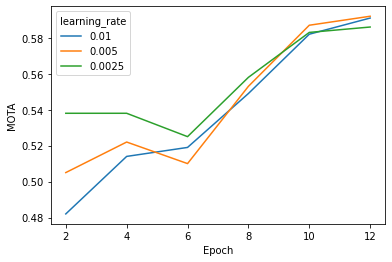

In [5]:

ax = sns.lineplot(data=val_df, x='epoch', y='MOTA', hue='learning_rate')
ax.set(xlabel='Epoch', ylabel='MOTA')
#ax.fig.suptitle('False Negatives')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'MOTP')]

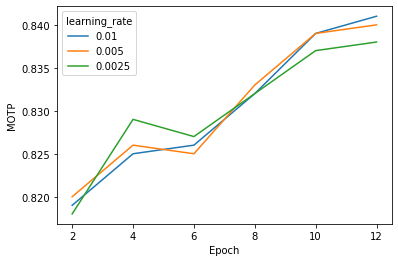

In [6]:
ax = sns.lineplot(data=val_df, x='epoch', y='MOTP', hue='learning_rate')
ax.set(xlabel='Epoch', ylabel='MOTP')
#ax.fig.suptitle('False Negatives')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'IDF1')]

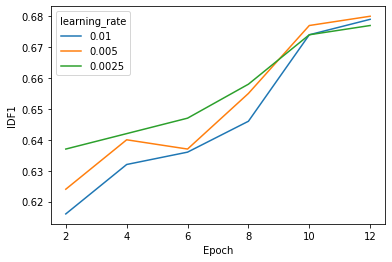

In [7]:
ax = sns.lineplot(data=val_df, x='epoch', y='IDF1', hue='learning_rate')
ax.set(xlabel='Epoch', ylabel='IDF1')
#ax.fig.suptitle('False Negatives')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'FN')]

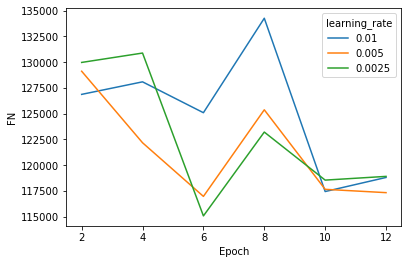

In [8]:
ax = sns.lineplot(data=val_df, x='epoch', y='FN', hue='learning_rate')
ax.set(xlabel='Epoch', ylabel='FN')
#ax.fig.suptitle('False Negatives')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'MT')]

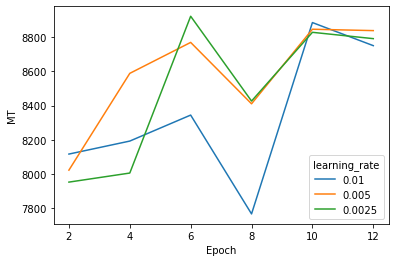

In [9]:
ax = sns.lineplot(data=val_df, x='epoch', y='MT', hue='learning_rate')
ax.set(xlabel='Epoch', ylabel='MT')
#ax.fig.suptitle('False Negatives')

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'PT')]

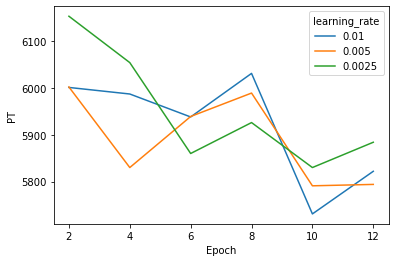

In [10]:
ax = sns.lineplot(data=val_df, x='epoch', y='PT', hue='learning_rate')
ax.set(xlabel='Epoch', ylabel='PT')
#ax.fig.suptitle('False Negatives')

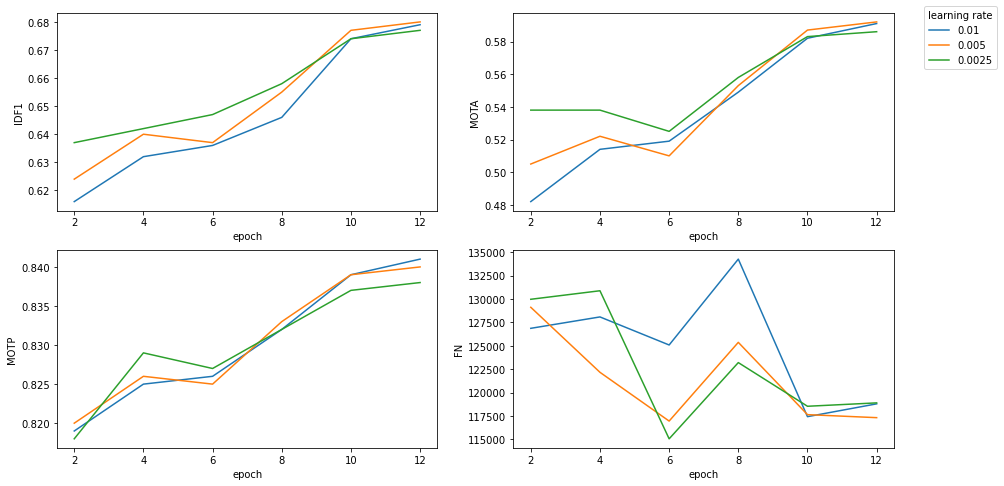

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(15,8))

#create boxplot in each subplot
idf_plot = sns.lineplot(data=val_df, x='epoch', y='IDF1', hue='learning_rate', ax=axes[0,0], legend=False)
mota_plot = sns.lineplot(data=val_df, x='epoch', y='MOTA', hue='learning_rate', ax=axes[0,1], legend=False)
motp_plot = sns.lineplot(data=val_df, x='epoch', y='MOTP', hue='learning_rate', ax=axes[1,0], legend=False)
fn_plot = sns.lineplot(data=val_df, x='epoch', y='FN', hue='learning_rate', ax=axes[1,1], legend=True)
handles, labels = axes[1][1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='learning rate', bbox_to_anchor=(1,0.90))
fn_plot.get_legend().remove()

# RPN classification loss

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, '')]

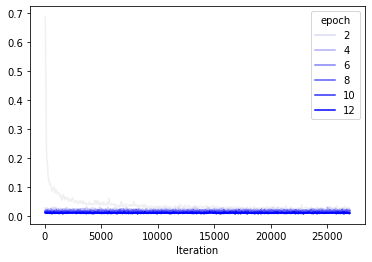

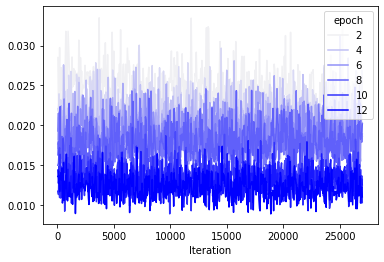

In [269]:
plt.figure()
ax = sns.lineplot(data=train_df, x='iter', y='loss_rpn_cls', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')
plt.figure()
ax = sns.lineplot(data=train_df[train_df['epoch'] != 1], x='iter', y='loss_rpn_cls', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')

# RPN regression loss

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, '')]

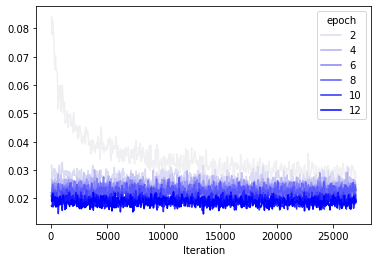

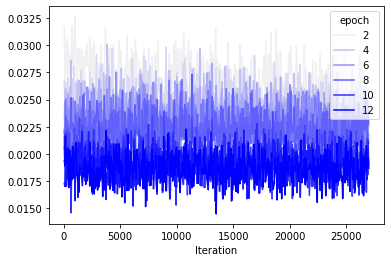

In [270]:
plt.figure()
ax = sns.lineplot(data=train_df, x='iter', y='loss_rpn_bbox', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')
plt.figure()
ax = sns.lineplot(data=train_df[train_df['epoch'] != 1], x='iter', y='loss_rpn_bbox', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')

FP VS FN
-A learning rate of 0.005 minimized False Negatives while simultaneously also having the largest amount of false positives. Put stuff here about the F1 score but since we want to minimize car accidents and also collisions with other people on the road. We believe that recall is a much better metric in this case. And since .005 also leads in that metric with 0.73. Then it is probably a better learning rate with this data.


FM
FM as a metric is Number of fragmentations where it is the number of times something switched from being tracked to not being tracked. Here .01 performed the best and .000625 was the worst. This means that a far lower learning rate made the network have less experience with tracking and that it probably did not have enough confidence to know how vehicles move.

MT 
MT stands for mostly tracked and it means that at least 80 percent of the lifespan of the vehicle was tracked. This was led by a learning rate of 0.005

# Classification Loss

[Text(0.5, 0, 'Iteration'), Text(0, 0.5, '')]

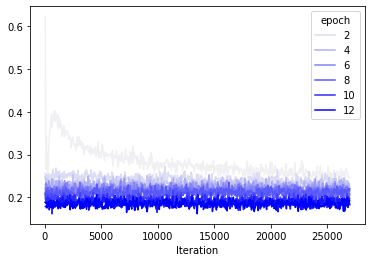

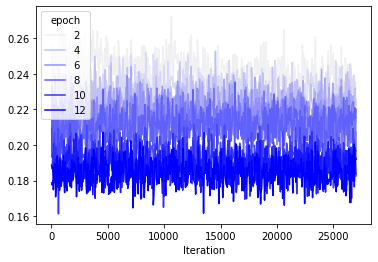

In [271]:
plt.figure()
ax = sns.lineplot(data=train_df, x='iter', y='loss_cls', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')
plt.figure()
ax = sns.lineplot(data=train_df[train_df['epoch'] != 1], x='iter', y='loss_cls', hue='epoch', palette=sns.color_palette("light:b", as_cmap=True))
ax.set(xlabel='Iteration', ylabel='')